In [1]:
from urllib2 import Request, urlopen
from urlparse import urlparse, urlunparse
import requests, requests_cache
import pandas as pd
import json
from wordcloud import WordCloud
from matplotlib import pyplot as plt
plt.style.use('ggplot')
from bs4 import BeautifulSoup
import re
from os import listdir
from os import chdir
from os.path import isfile, join
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import numpy as np
import string
from textblob import TextBlob
import pylab
from __future__ import division
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
import itertools

In [2]:
from collections import Counter

In [3]:
import numpy as np

In [40]:
ind = np.arange(3)

In [4]:
chdir('../sta141bfinal/all/')

In [5]:
def read_text(filename):
    """
    This function reads a txt file with filtered or unfiltered list of titles
    Input: A txt file
    Output: Filtered list of titles
    """
    
    title_names = []
    text_file = open(filename,"r")

    for line in text_file:
        line = line.strip()
        title_names.append(line)

    return title_names

In [6]:
huff = read_text("huffpost.txt")
abc = read_text("abc.txt")
economist = read_text("economist.txt")
fox = read_text("fox.txt")
npr = read_text("npr.txt")
nytimes = read_text("nytimes.txt")
washington = read_text("washington.txt")
wsj = read_text("wsj.txt")
breitbart = read_text("breitbart.txt")

In [7]:
total = huff + abc + economist + fox + npr + nytimes + washington + wsj + breitbart
conserv = fox + breitbart
liber = huff + abc + nytimes + washington
othernews = economist + npr + wsj

In [8]:
def token_word(all_titles):
    tokentit = [re.sub("[^a-zA-Z]"," ",i) for i in all_titles]
    tokenword = [word_tokenize(w) for w in tokentit]
    merged = list(itertools.chain(*tokenword))
    words = [w for w in merged if not w in stopwords.words("english")]
    trumps_admin = ['whitehouse','Trump','conway','sessions','pence','president','tillerson', 'Spicer', 'devos','march', 'flynn','kushner','carson','department','preibus','bannon','spicer','miller', 'steve','Donald','jeff','sean', 'trump', 'President', 'donald', 'white', 'White', 'house', 'House', 'u']
    wording = [w for w in words if not w in trumps_admin]
    new_words = []
    total_titles = [line.translate(None, string.punctuation) for line in wording]
    token_word = [new_words.extend(word_tokenize(w)) for w in wording]
    filtered_words = [word for word in new_words if word.lower() not in stopwords.words('english')]
    
    return filtered_words

In [28]:
combined_news = token_word(total)
conserv_news = token_word(conserv)
liber_news = token_word(liber)
other_news = token_word(othernews)
huff_tok = token_word(huff)
abc_tok = token_word(abc)
econ_tok = token_word(economist)
fox_tok = token_word(fox)
npr_tok = token_word(npr)
nyt_tok = token_word(nytimes)
wash_tok = token_word(washington)
bb_tok = token_word(breitbart)
wsj_tok = token_word(wsj)

In [29]:
df_combined = pd.DataFrame(Counter(combined_news).most_common()[0:20])
df_c = pd.DataFrame(Counter(conserv_news).most_common()[0:20])
df_l = pd.DataFrame(Counter(liber_news).most_common()[0:20])
df_huff = pd.DataFrame(Counter(huff_tok).most_common()[0:20])
df_abc = pd.DataFrame(Counter(abc_tok).most_common()[0:20])
df_econ = pd.DataFrame(Counter(econ_tok).most_common()[0:20])
df_fox = pd.DataFrame(Counter(fox_tok).most_common()[0:20])
df_npr = pd.DataFrame(Counter(npr_tok).most_common()[0:20])
df_nyt = pd.DataFrame(Counter(nyt_tok).most_common()[0:20])
df_wash = pd.DataFrame(Counter(wash_tok).most_common()[0:20])
df_bb = pd.DataFrame(Counter(bb_tok).most_common()[0:20])
df_wsj = pd.DataFrame(Counter(wsj_tok).most_common()[0:20])

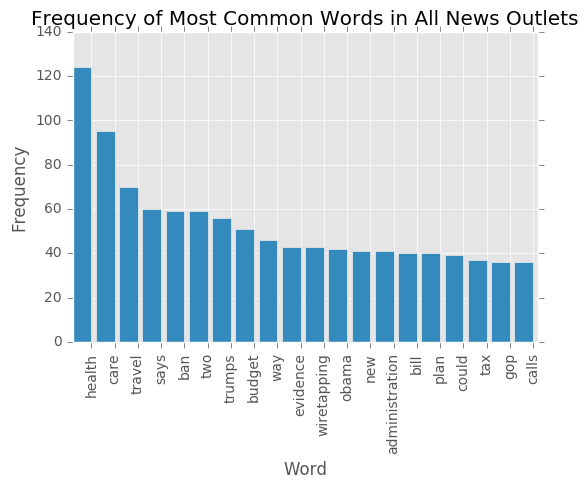

In [11]:
ind = np.arange(20)
width = 0.8
fig = plt.figure()
ax = fig.add_subplot(111)

rects1 = ax.bar(ind, df_combined.ix[:, 1].values, width)
ax.set_ylabel('Frequency')
ax.set_xlabel('Word')
ax.set_xticks(ind+width)
ax.set_title("Frequency of Most Common Words in All News Outlets")
ax.set_xticklabels(df_combined[0], rotation = 90)
plt.show()

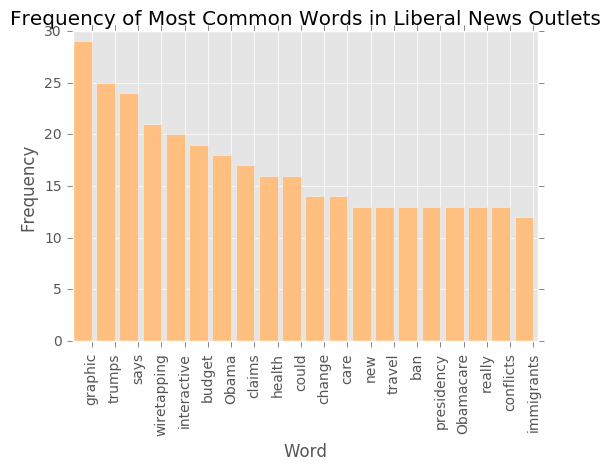

In [12]:
ind = np.arange(20)
width = 0.8
fig = plt.figure()
ax = fig.add_subplot(111)

rects1 = ax.bar(ind, df_l.ix[:, 1].values, width, color = "#ffbf80")
ax.set_ylabel('Frequency')
ax.set_xlabel('Word')
ax.set_xticks(ind+width)
ax.set_title("Frequency of Most Common Words in Liberal News Outlets")
ax.set_xticklabels(df_l[0], rotation = 90)
plt.show()

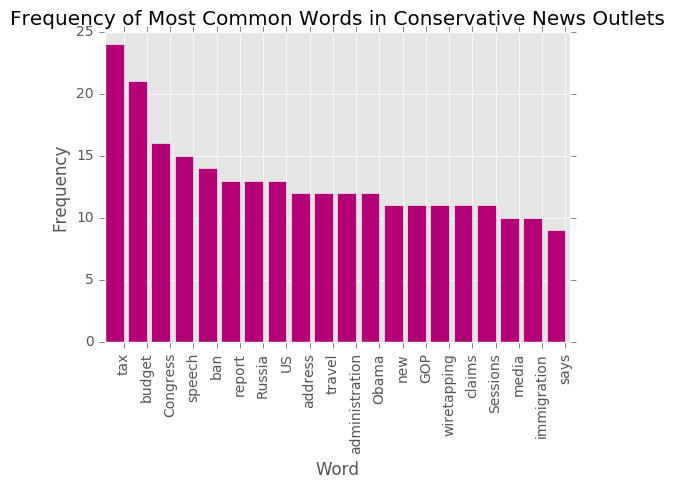

In [13]:
ind = np.arange(20)
width = 0.8
fig = plt.figure()
ax = fig.add_subplot(111)

rects1 = ax.bar(ind, df_c.ix[:, 1].values, width, color = "#b30077")
ax.set_ylabel('Frequency')
ax.set_xlabel('Word')
ax.set_xticks(ind+width)
ax.set_title("Frequency of Most Common Words in Conservative News Outlets")
ax.set_xticklabels(df_c[0], rotation = 90)
plt.show()

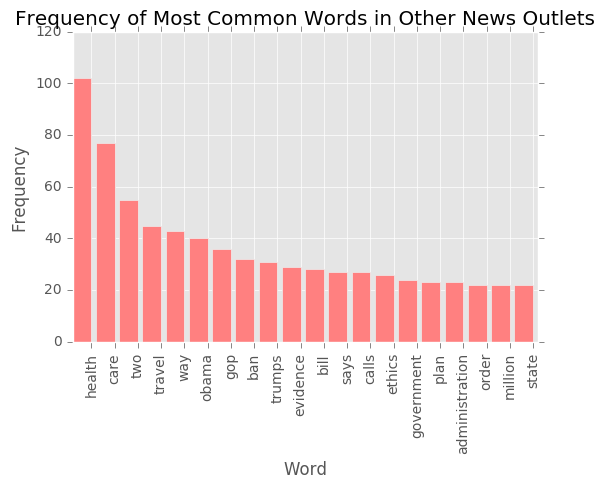

In [14]:
ind = np.arange(20)
width = 0.8
fig = plt.figure()
ax = fig.add_subplot(111)

rects1 = ax.bar(ind, df_o.ix[:, 1].values, width, color = "#ff8080")
ax.set_ylabel('Frequency')
ax.set_xlabel('Word')
ax.set_xticks(ind+width)
ax.set_title("Frequency of Most Common Words in Other News Outlets")
ax.set_xticklabels(df_o[0], rotation = 90)
plt.show()

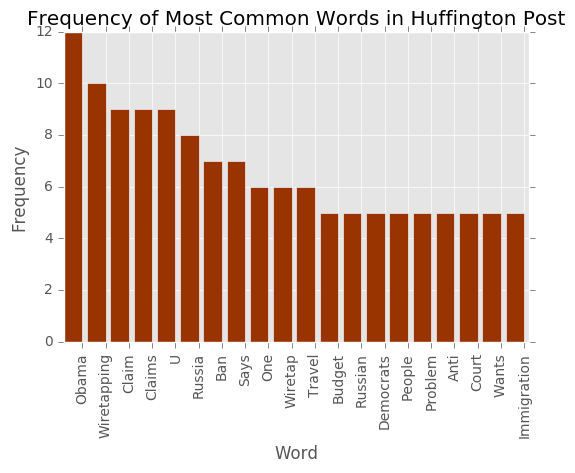

In [41]:
ind = np.arange(20)
width = 0.8
fig = plt.figure()
ax = fig.add_subplot(111)

rects1 = ax.bar(ind, df_huff.ix[:, 1].values, width, color = "#993300")
ax.set_ylabel('Frequency')
ax.set_xlabel('Word')
ax.set_xticks(ind+width)
ax.set_title("Frequency of Most Common Words in Huffington Post")
ax.set_xticklabels(df_huff[0], rotation = 90)
plt.show()

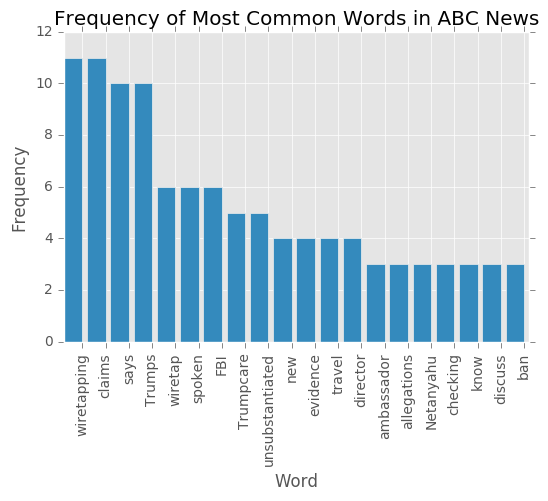

In [42]:
ind = np.arange(20)
width = 0.8
fig = plt.figure()
ax = fig.add_subplot(111)

rects1 = ax.bar(ind, df_abc.ix[:, 1].values, width)
ax.set_ylabel('Frequency')
ax.set_xlabel('Word')
ax.set_xticks(ind+width)
ax.set_title("Frequency of Most Common Words in ABC News")
ax.set_xticklabels(df_abc[0], rotation = 90)
plt.show()

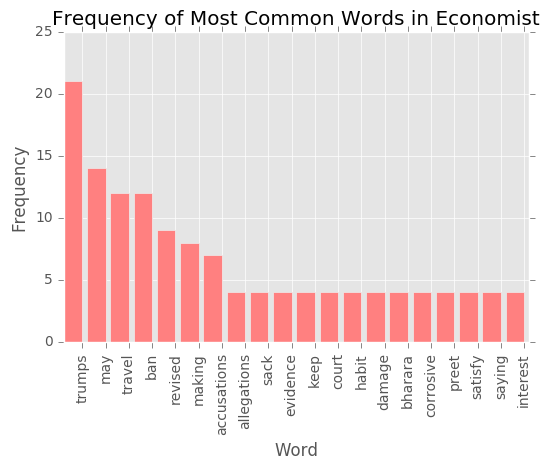

In [22]:
ind = np.arange(20)
width = 0.8
fig = plt.figure()
ax = fig.add_subplot(111)

rects1 = ax.bar(ind, df_econ.ix[:, 1].values, width, color = "#ff8080")
ax.set_ylabel('Frequency')
ax.set_xlabel('Word')
ax.set_xticks(ind+width)
ax.set_title("Frequency of Most Common Words in Economist")
ax.set_xticklabels(df_econ[0], rotation = 90)
plt.show()

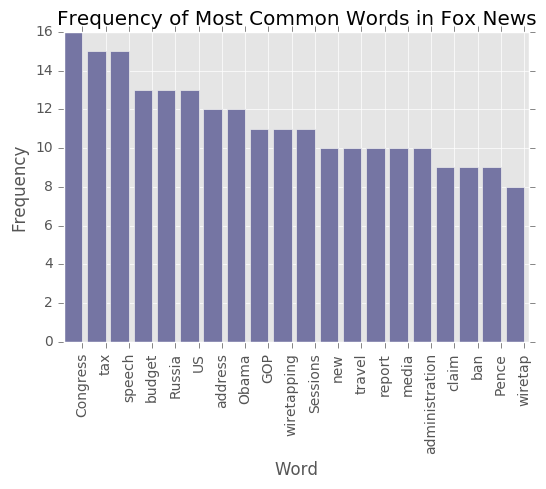

In [40]:
ind = np.arange(20)
width = 0.8
fig = plt.figure()
ax = fig.add_subplot(111)

rects1 = ax.bar(ind, df_fox.ix[:, 1].values, width, color = "#7575a3")
ax.set_ylabel('Frequency')
ax.set_xlabel('Word')
ax.set_xticks(ind+width)
ax.set_title("Frequency of Most Common Words in Fox News")
ax.set_xticklabels(df_fox[0], rotation = 90)
plt.show()

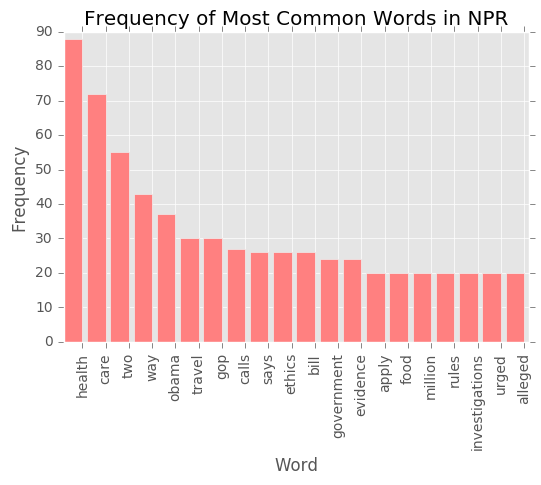

In [24]:
ind = np.arange(20)
width = 0.8
fig = plt.figure()
ax = fig.add_subplot(111)

rects1 = ax.bar(ind, df_npr.ix[:, 1].values, width, color = "#ff8080")
ax.set_ylabel('Frequency')
ax.set_xlabel('Word')
ax.set_xticks(ind+width)
ax.set_title("Frequency of Most Common Words in NPR")
ax.set_xticklabels(df_npr[0], rotation = 90)
plt.show()

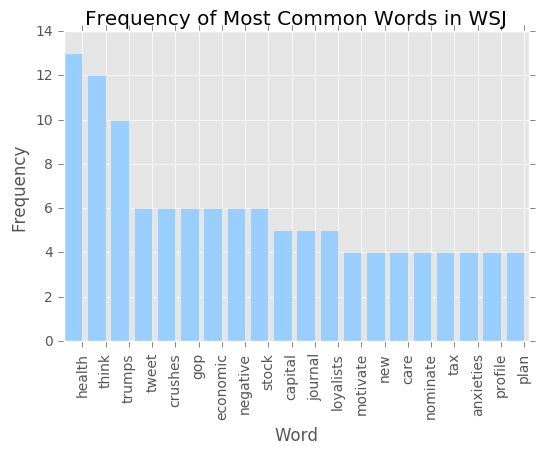

In [38]:
ind = np.arange(20)
width = 0.8
fig = plt.figure()
ax = fig.add_subplot(111)

rects1 = ax.bar(ind, df_wsj.ix[:, 1].values, width, color = "#99ceff")
ax.set_ylabel('Frequency')
ax.set_xlabel('Word')
ax.set_xticks(ind+width)
ax.set_title("Frequency of Most Common Words in WSJ")
ax.set_xticklabels(df_wsj[0], rotation = 90)
plt.show()

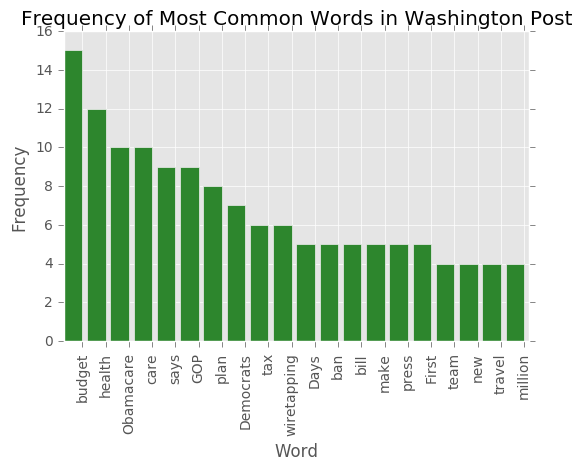

In [39]:
ind = np.arange(20)
width = 0.8
fig = plt.figure()
ax = fig.add_subplot(111)

rects1 = ax.bar(ind, df_wash.ix[:, 1].values, width, color = "#2d862d")
ax.set_ylabel('Frequency')
ax.set_xlabel('Word')
ax.set_xticks(ind+width)
ax.set_title("Frequency of Most Common Words in Washington Post")
ax.set_xticklabels(df_wash[0], rotation = 90)
plt.show()

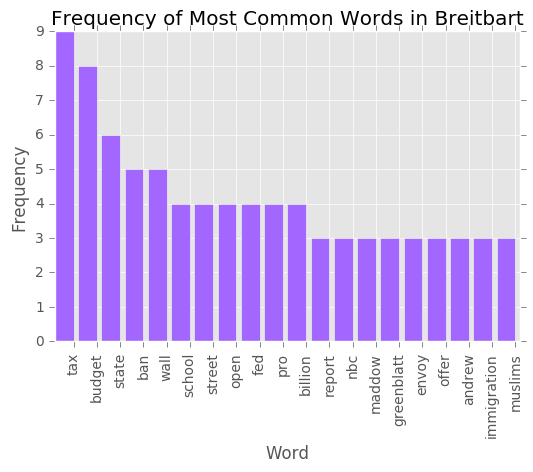

In [36]:
ind = np.arange(20)
width = 0.8
fig = plt.figure()
ax = fig.add_subplot(111)

rects1 = ax.bar(ind, df_bb.ix[:, 1].values, width, color = "#a366ff")
ax.set_ylabel('Frequency')
ax.set_xlabel('Word')
ax.set_xticks(ind+width)
ax.set_title("Frequency of Most Common Words in Breitbart")
ax.set_xticklabels(df_bb[0], rotation = 90)
plt.show()

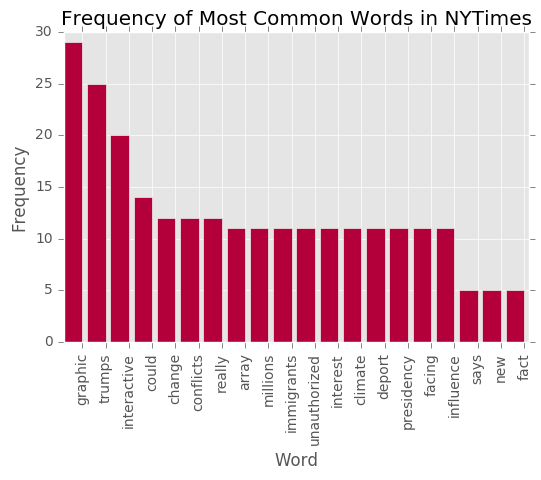

In [35]:
ind = np.arange(20)
width = 0.8
fig = plt.figure()
ax = fig.add_subplot(111)

rects1 = ax.bar(ind, df_nyt.ix[:, 1].values, width, color = "#b3003b")
ax.set_ylabel('Frequency')
ax.set_xlabel('Word')
ax.set_xticks(ind+width)
ax.set_title("Frequency of Most Common Words in NYTimes")
ax.set_xticklabels(df_nyt[0], rotation = 90)
plt.show()

In [186]:
def noun_polarity(total_list):

    noun_phrases = []
    for title in total_list:
        blob = TextBlob(title)
        noun_phrases.extend(blob.noun_phrases)
    
    noun_polarity = []
    noun_subjectivity = []
    for noun in noun_phrases:
        blob = TextBlob(noun)
        noun_polarity.append(blob.sentiment.polarity)
        noun_subjectivity.append(blob.sentiment.subjectivity)
    
    return noun_polarity, noun_subjectivity


In [187]:
huff_noun_pol, huff_noun_sub = noun_polarity(huff)

In [188]:
abc_noun_pol, abc_noun_sub = noun_polarity(abc)

In [189]:
economist_noun_pol, economist_noun_sub = noun_polarity(economist)

In [190]:
fox_noun_pol, fox_noun_sub = noun_polarity(fox)

In [191]:
npr_noun_pol, npr_noun_sub = noun_polarity(npr)

In [192]:
nytimes_noun_pol, nytimes_noun_sub = noun_polarity(nytimes)

In [193]:
washington_noun_pol, washington_noun_sub = noun_polarity(washington)

In [194]:
wsj_noun_pol, wsj_noun_sub = noun_polarity(wsj)

In [195]:
breitbart_noun_pol, breitbart_noun_sub = noun_polarity(breitbart)

In [196]:
def polarity_levels(total_pol, name, typenews, num):
    pos_pol = [i for i in total_pol if i > 0]
    pos_pol = str(len(pos_pol) / num)
    neg_pol = [i for i in total_pol if i < 0]
    neg_pol = str(len(neg_pol) / num)
    all_pol = [name, neg_pol, pos_pol, typenews]
    
    return all_pol

In [197]:
hp = polarity_levels(huff_noun_pol, "Huffington Post", "Liberal", len(huff))
hp

['Huffington Post', '0.185628742515', '0.173652694611', 'Liberal']

In [198]:
ab = polarity_levels(abc_noun_pol, "ABC News", "Liberal", len(abc))
ab

['ABC News', '0.13698630137', '0.123287671233', 'Liberal']

In [199]:
ec = polarity_levels(economist_noun_pol, "Economist", "Other", len(economist))
fo = polarity_levels(fox_noun_pol, "Fox", "Conservative", len(fox))
np = polarity_levels(npr_noun_pol, "NPR", "Other", len(npr))
ny = polarity_levels(nytimes_noun_pol, "NYTimes", "Liberal", len(nytimes))
wa = polarity_levels(washington_noun_pol, "Washington Post", "Liberal", len(washington))
ws = polarity_levels(wsj_noun_pol, "WSJ", "Other", len(wsj))
br = polarity_levels(breitbart_noun_pol, "Breitbart", "Conservative", len(breitbart))

In [201]:
df = pd.DataFrame([hp, ab, ec, fo, np, ny, wa, ws, br])
df.columns = ['News Outlet', 'Negative', 'Positive', 'Category']
df

,News Outlet,Negative,Positive,Category
0,Huffington Post,0.185628742515,0.173652694611,Liberal
1,ABC News,0.13698630137,0.123287671233,Liberal
2,Economist,0.027027027027,0.0810810810811,Other
3,Fox,0.0737179487179,0.0897435897436,Conservative
4,NPR,0.10514541387,0.136465324385,Other
5,NYTimes,0.04375,0.06875,Liberal
6,Washington Post,0.0774647887324,0.147887323944,Liberal
7,WSJ,0.123287671233,0.150684931507,Other
8,Breitbart,0.0727272727273,0.2,Conservative


In [204]:
df_conservative = df[df['Category'] == "Conservative"]
df_conservative

,News Outlet,Negative,Positive,Category
3,Fox,0.0737179487179,0.0897435897436,Conservative
8,Breitbart,0.0727272727273,0.2,Conservative


In [205]:
df_other = df[df['Category'] == "Other"]
df_other

,News Outlet,Negative,Positive,Category
2,Economist,0.027027027027,0.0810810810811,Other
4,NPR,0.10514541387,0.136465324385,Other
7,WSJ,0.123287671233,0.150684931507,Other


In [206]:
df_liberal = df[df['Category'] == "Liberal"]
df_liberal

,News Outlet,Negative,Positive,Category
0,Huffington Post,0.185628742515,0.173652694611,Liberal
1,ABC News,0.13698630137,0.123287671233,Liberal
5,NYTimes,0.04375,0.06875,Liberal
6,Washington Post,0.0774647887324,0.147887323944,Liberal


In [23]:
lib1 = sum(float(item) for item in df_liberal[1])
con1 = sum(float(item) for item in df_conservative[1])
oth1 = sum(float(item) for item in df_other[1])

In [24]:
lib2 = sum(float(item) for item in df_liberal[2])
con2 = sum(float(item) for item in df_conservative[2])
oth2 = sum(float(item) for item in df_other[2])
total_other = [oth1, oth2]
total_con = [con1, con2]
total_lib = [lib1, lib2]

In [208]:
import numpy as np
ind = np.arange(2)

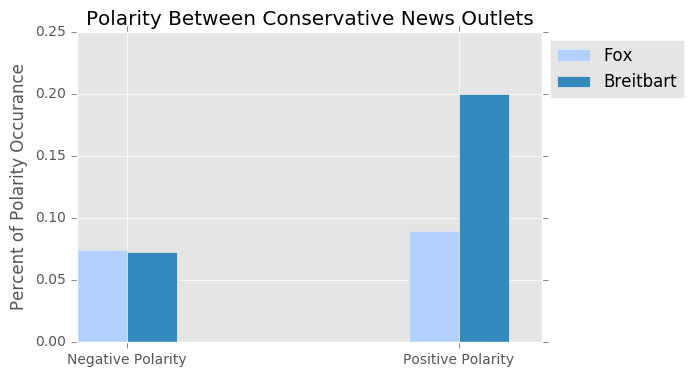

In [234]:
ind = np.arange(2)
width = 0.15
fig = plt.figure()
ax = fig.add_subplot(111)

rects1 = ax.bar(ind, df_conservative.iloc[0, 1:3].values, width, color='b')
rects1 = ax.bar(ind, df_conservative.iloc[0, 1:3].values, width, color='#b3d1ff')

rects2 = ax.bar(ind+width, df_conservative.iloc[1, 1:3].values, width)

ax.set_ylabel('Percent of Polarity Occurance')
ax.set_xticks(ind+width)
ax.set_title("Polarity Between Conservative News Outlets")
ax.set_xticklabels( ('Negative Polarity', 'Positive Polarity') )
ax.legend( (rects1[0], rects2[0]), ('Fox', 'Breitbart'), bbox_to_anchor=(1, 1), loc=2)
plt.show()

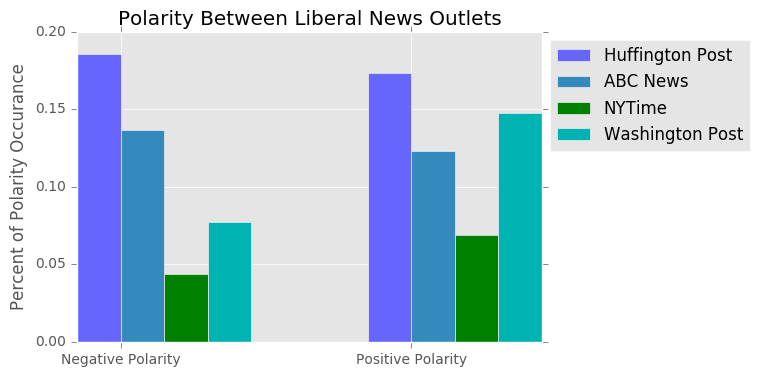

In [233]:

width = 0.15
fig = plt.figure()
ax = fig.add_subplot(111)

rects1 = ax.bar(ind, df_liberal.iloc[0, 1:3].values, width, color='#6666ff')


rects2 = ax.bar(ind+width, df_liberal.iloc[1, 1:3].values, width)
rects3 = ax.bar(ind+width+width, df_liberal.iloc[2, 1:3].values, width, color = 'g')

rects4 = ax.bar(ind+width+width+width, df_liberal.iloc[3, 1:3].values, width, color = '#00b3b3')

ax.set_ylabel('Percent of Polarity Occurance')
ax.set_xticks(ind+width)
ax.set_title("Polarity Between Liberal News Outlets")
ax.set_xticklabels( ('Negative Polarity',  'Positive Polarity') )
ax.legend( (rects1[0], rects2[0], rects3[0], rects4[0]), ('Huffington Post', 'ABC News', 'NYTime', 'Washington Post'), bbox_to_anchor=(1, 1), loc=2)
plt.show()

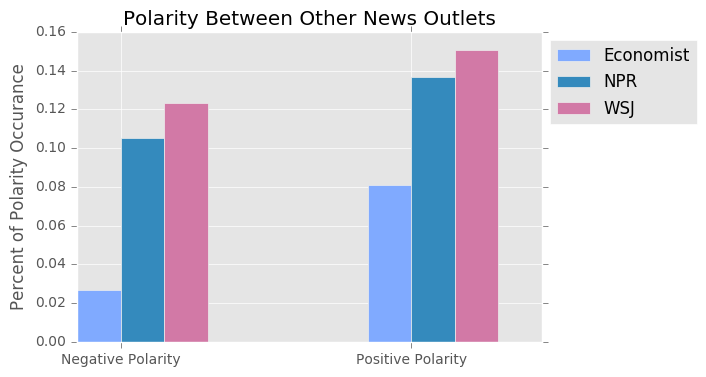

In [232]:
#ind = np.arange(3)
width = 0.15
fig = plt.figure()
ax = fig.add_subplot(111)
rects1 = ax.bar(ind, df_other.iloc[0, 1:3].values, width, color='#80aaff')

rects2 = ax.bar(ind+width, df_other.iloc[1, 1:3].values, width)
rects3 = ax.bar(ind+width+width, df_other.iloc[2, 1:3].values, width, color = '#d279a6')


ax.set_ylabel('Percent of Polarity Occurance')
ax.set_xticks(ind+width)
ax.set_title("Polarity Between Other News Outlets")
ax.set_xticklabels( ('Negative Polarity', 'Positive Polarity') )
ax.legend( (rects1[0], rects2[0], rects3[0]), ('Economist', 'NPR', 'WSJ'), bbox_to_anchor=(1, 1), loc=2)
plt.show()

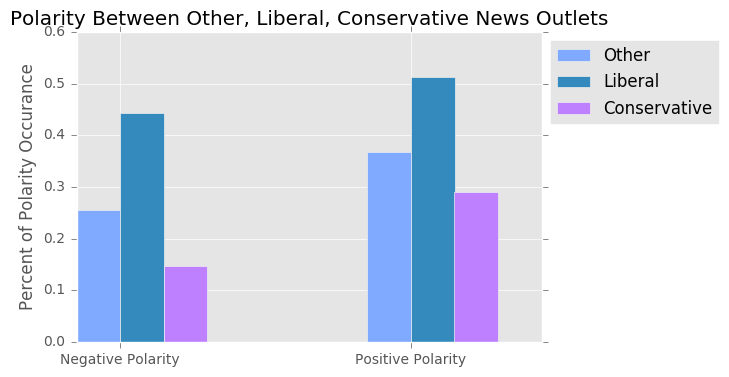

In [231]:
#ind = np.arange(2)
width = 0.15
fig = plt.figure()
ax = fig.add_subplot(111)

rects1 = ax.bar(ind, total_other, width, color='#80aaff')

rects2 = ax.bar(ind+width, total_lib, width)
rects3 = ax.bar(ind+width+width, total_con, width, color = '#bf80ff')


ax.set_ylabel('Percent of Polarity Occurance')
ax.set_xticks(ind+width)
ax.set_title("Polarity Between Other, Liberal, Conservative News Outlets")
ax.set_xticklabels( ('Negative Polarity', 'Positive Polarity') )
ax.legend( (rects1[0], rects2[0], rects3[0]), ('Other', 'Liberal', 'Conservative'), bbox_to_anchor=(1, 1), loc=2)
plt.show()